In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import sys
import os
import xarray as xr
import math
import numpy as np
import matplotlib.pyplot as plt

In [9]:
sys.path.append('/home/cucchi/phd/devel/phd/')
RESP_PATH = '/home/cucchi/phd/data/response/lorenz96/rk4/SF_8_1.0_0/'
obs = 'energy_bin_0.1q_0.2q'
force_intensity_delta = 2.0
forcing = 'SF_8_{}_0'.format(force_intensity_delta)

In [11]:
from lab import analysis
from lab.simulation import forcings

Average response

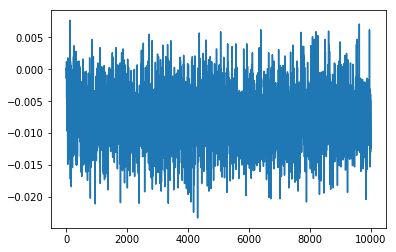

In [12]:
response_p1 = xr.open_dataarray(os.path.join(RESP_PATH, 'response_lorenz96_rk4_{}_SF_8_1.0_0.nc'.format(obs)))
plt.plot(response_p1)

Susceptibility

/home/cucchi/miniconda3/envs/l96/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


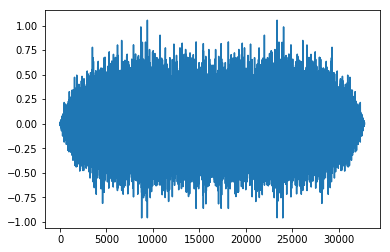

In [13]:
chi = analysis.compute_susceptibility(response_p1.values.squeeze())
plt.plot(chi)

Predicted Response

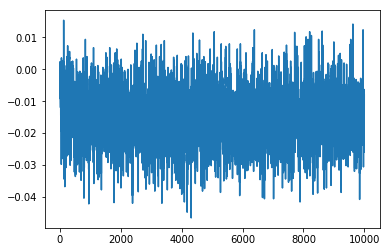

In [9]:
resp_pred = analysis.compute_response(chi, forcings.StepForcing(force_intensity_delta=force_intensity_delta))
plt.plot(resp_pred[0:10000])

Real Response

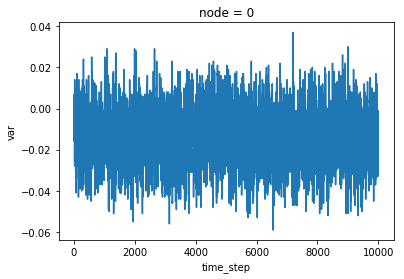

In [10]:
resp_real = xr.open_dataarray('/home/cucchi/phd/data/response/lorenz96/rk4/{f}/response_lorenz96_rk4_{o}_{f}.nc'.format(
    o=obs,
    f=forcing
))
resp_real.plot()

### Average

In [11]:
std_pred = resp_pred[0:10000].std()
sig_digit_pred = -math.floor(math.log10(std_pred))
print('predicted: {} +/- {}'.format(
    round(resp_pred[0:10000].mean(), sig_digit_pred), 
    round(resp_pred[0:10000].std(),sig_digit_pred)
))
std_real = resp_real.std().values
sig_digit_real = -math.floor(math.log10(std_real))
print('real:      {} +/- {}'.format(
    round(float(resp_real.mean().values), sig_digit_real), 
    round(float(resp_real.std().values), sig_digit_real)
))

predicted: -0.015 +/- 0.008
real:      -0.01 +/- 0.01


## Semi-Difference

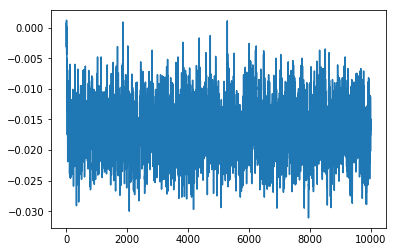

In [12]:
RESP_PATH = '/home/cucchi/phd/data/response/lorenz96/rk4/SF_8_-1.0_0/'
response_m1 = xr.open_dataarray(os.path.join(RESP_PATH, 'response_lorenz96_rk4_{}_SF_8_-1.0_0.nc'.format(obs)))
response = (response_p1 - response_m1)/2
chi = analysis.compute_susceptibility(response.values.squeeze())
resp_pred = analysis.compute_response(chi, forcings.StepForcing(force_intensity_delta=force_intensity_delta))
plt.plot(resp_pred[0:10000])

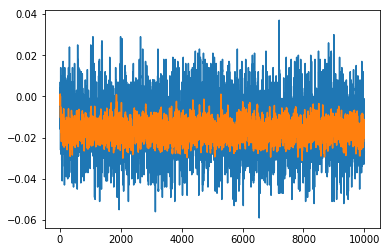

In [15]:
plt.plot(resp_real[0:10000])
plt.plot(resp_pred[0:10000])

### Average

In [13]:
std_pred = resp_pred[0:10000].std()
sig_digit_pred = -math.floor(math.log10(std_pred))
print('predicted: {} +/- {}'.format(
    round(resp_pred[0:10000].mean(), sig_digit_pred), 
    round(resp_pred[0:10000].std(),sig_digit_pred)
))
std_real = resp_real.std().values
sig_digit_real = -math.floor(math.log10(std_real))
print('real:      {} +/- {}'.format(
    round(float(resp_real.mean().values), sig_digit_real), 
    round(float(resp_real.std().values), sig_digit_real)
))

predicted: -0.016 +/- 0.004
real:      -0.01 +/- 0.01


### Block-Average

In [21]:
resp_real.rolling(time=1000).mean()

KeyError: 'time'

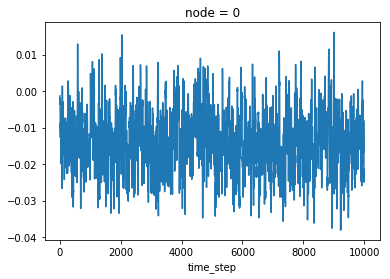

In [26]:
resp_real.rolling(time_step=10).mean().plot()